In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
import env
import prepare
import acquire
from matplotlib import style
style.use("ggplot")
from wordcloud import WordCloud

In [42]:
url = env.get_db_url('spam_db')
query = 'SELECT * FROM spam'
df = pd.read_sql(query, url)

In [43]:
df.head()

,id,label,text
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [44]:
# clean df
df['clean_text'] = df['text'].apply(prepare.more_clean)

In [45]:
ham_words = (' '.join(df[df.label == 'ham'].clean_text))
spam_words = (' '.join(df[df.label == 'spam'].clean_text))
all_words = (' '.join(df.clean_text))

In [46]:
ham_bigrams = list(nltk.bigrams(ham_words.split()))
ham_bigrams_count = pd.Series(ham_bigrams).value_counts()
spam_bigrams = list(nltk.bigrams(spam_words.split()))
spam_bigrams_count = pd.Series(spam_bigrams).value_counts()
all_bigrams = list(nltk.bigrams(all_words.split()))
all_bigrams_count = pd.Series(all_bigrams).value_counts()


In [47]:
bigram_counts = pd.concat([ham_bigrams_count, spam_bigrams_count, all_bigrams_count], axis=1).fillna(0).astype(int)
bigram_counts.columns = ['ham', 'spam', 'all']
bigram_counts.sort_values('all', ascending=False).head(5)

,,ham,spam,all
lt,gt,276,0,276
please,call,9,46,55
call,later,52,0,52
co,uk,0,49,49
u,r,39,7,46


In [48]:
bigram_counts.sort_values('spam', ascending=False).head(5)

,,ham,spam,all
co,uk,0,49,49
please,call,9,46,55
contact,u,2,35,37
customer,service,2,27,29
a1,50,0,25,25


Text(0.5, 1.0, 'Top 10 most common spam bigrams')

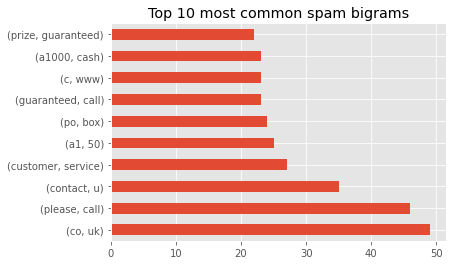

In [49]:
# create bigrams
pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam bigrams')



Text(0.5, 1.0, 'Top 10 most common spam bigrams')

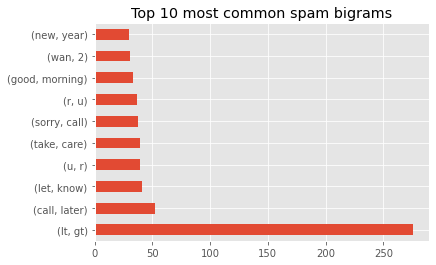

In [50]:
pd.Series(nltk.bigrams(ham_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam bigrams')

Text(0.5, 1.0, 'Proportion of Spam vs Ham for the 20 most common bigrams')

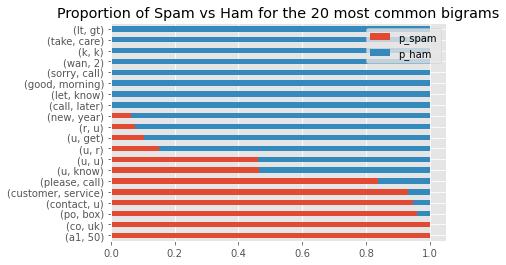

In [51]:
# figure out the percentage of spam vs ham
(bigram_counts
 .assign(p_spam=bigram_counts.spam / bigram_counts['all'],
         p_ham=bigram_counts.ham / bigram_counts['all'])
 .sort_values(by='all')
 [['p_spam', 'p_ham']]
 .tail(20)
 .sort_values('p_ham')
 .plot.barh(stacked=True))

plt.title('Proportion of Spam vs Ham for the 20 most common bigrams')

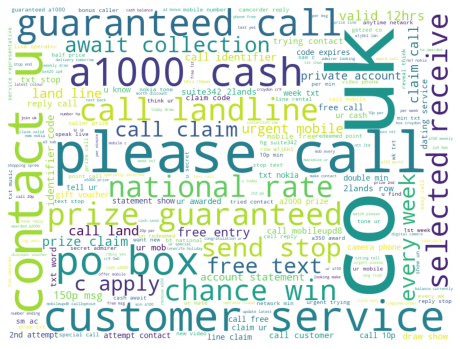

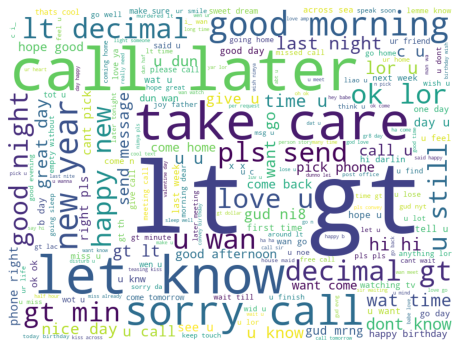

In [52]:
img1 = WordCloud(background_color='white', width=800, height=600, collocation_threshold=2).generate(spam_words)
img2 = WordCloud(background_color='white', width=800, height=600, collocation_threshold=2).generate(ham_words)
# show images
plt.figure(figsize=(8,8))
plt.imshow(img1)
plt.axis('off')
plt.show()
plt.figure(figsize=(8,8))
plt.imshow(img2)
plt.axis('off')
plt.show()

In [53]:
spam_trigrams = list(nltk.trigrams(spam_words.split()))
spam_trigrams_count = pd.Series(spam_trigrams).value_counts()
ham_trigrams = list(nltk.trigrams(ham_words.split()))
ham_trigrams_count = pd.Series(ham_trigrams).value_counts()
all_trigrams = list(nltk.trigrams(all_words.split()))
all_trigrams_count = pd.Series(all_trigrams).value_counts()
trigram_counts = pd.concat([ham_trigrams_count, spam_trigrams_count, all_trigrams_count], axis=1).fillna(0).astype(int)
trigram_counts.columns = ['ham', 'spam', 'all']
trigram_counts.sort_values('all', ascending=False).head(5)


,,,ham,spam,all
sorry,call,later,38,0,38
lt,decimal,gt,23,0,23
u,wan,2,21,0,21
prize,guaranteed,call,0,21,21
lt,gt,min,19,0,19


Text(0.5, 1.0, 'Proportion of Spam vs Ham for the 20 most common bigrams')

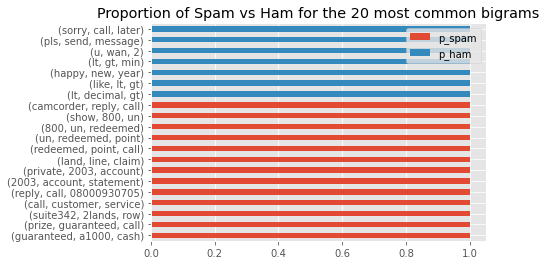

In [54]:
# figure out the percentage of spam vs ham
(trigram_counts
 .assign(p_spam=trigram_counts.spam / trigram_counts['all'],
         p_ham=trigram_counts.ham / trigram_counts['all'])
 .sort_values(by='all')
 [['p_spam', 'p_ham']]
 .tail(20)
 .sort_values('p_ham')
 .plot.barh(stacked=True))

plt.title('Proportion of Spam vs Ham for the 20 most common bigrams')

In [65]:
codeup_df = acquire.get_all_posts()
codeup_df.head()

Using cached version of posts


,title,date,body
0,Learn to Code: Python Workshop on 4/23,"Mar 31, 2022","According to LinkedIn, the “#1 Most Promising ..."
1,Coming Soon: Cloud Administration,"Mar 17, 2022",We’re launching a new program out of San Anton...
2,5 Books Every Woman In Tech Should Read,"Mar 8, 2022",On this International Women’s Day 2022 we want...
3,Codeup Start Dates for March 2022,"Jan 26, 2022",As we approach the end of January we wanted to...
4,VET TEC Funding Now Available For Dallas Veterans,"Jan 7, 2022",We are so happy to announce that VET TEC benef...


In [70]:
title_words = (''.join(codeup_df['title'].apply(prepare.more_clean)))
title_words_count = pd.Series(title_words.split()).value_counts()
body_words = (''.join(codeup_df['body'].astype(str).apply(prepare.more_clean)))
body_words_count = pd.Series(body_words.split()).value_counts()
all_words = title_words + body_words
all_words_count = pd.Series(all_words.split()).value_counts()

In [72]:
word_counts = (pd.concat([all_words_count, title_words_count, body_words_count], axis=1, sort=True)
                .set_axis(['all', 'title', 'body'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.sort_values('all', ascending=False).head(10)

,all,title,body
codeup,938,17,921
data,651,12,639
wa,578,1,577
student,464,5,459
job,446,7,439
career,425,9,416
developer,396,1,395
program,375,1,374
time,370,0,370
like,368,1,367


In [73]:
pd.concat([word_counts[word_counts.title == 0].sort_values(by='body').tail(6),
           word_counts[word_counts.body == 0].sort_values(by='title').tail(6)])

,all,title,body
want,210,0,210
u,231,0,231
skill,260,0,260
one,340,0,340
work,342,0,342
time,370,0,370
codingpress,1,1,0
developercoding,2,2,0
sciencecodeup,2,2,0
codeupcodeups,2,2,0
